# Рассчет профилей спектральных линий в приближении Милна-Эддингтона

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(1, '..')
from inverse_problem import me_model
%matplotlib inline

### Входные параметры функции

- line_vec - вектор параметров линии (постоянны при решении обратной задачи):
    + wl0 - центральная длина волны линии (в ангстремах), 
    + g - Ланде-фактор линии
    + mu - косинус угла между LOS и нормалью поверхности 
- param_vec - вектор параметров инверсии (подбираются при решении обратной задачи):
    + B - величина магнитного поля (в гауссах)
    + theta - угол наклона магнитного поля (в радианах)
    + xi - азимут магнитного поля (в радианах)
    + D - доплеровское уширение линии (в миллиангстремах)
    + gamma - лоренцовское затухание линии (в миллиангстремах)
    + Dop_shift - доплеровский сдвиг линии (в миллиангстремах)
- x - точка рассчета параметров IQUV (в миллиангстремах от центральной длины волны)

    

### Выход функции

In [5]:
line_vec = (6302.5, 2.5, 1)
line_arg = 1000 * (np.linspace(6302.0692255, 6303.2544205, 56) - line_vec[0])
param_vec = [1000., 15., 20., 30., 1., 50., 0.5, 0.5, 0, 0.7, -9]
me_model(param_vec, line_arg, line_vec, with_ff=True).shape

(1, 56, 4)

То есть мы получаем для заданного вектора параметров инверсии одну точку для каждой спектральной линиии.
Функция возвращает вектор Стокса IQUV в заданной точке, реально нужно для набора точек

## Построение модельной спектрограммы

Тут хотим посмотреть поведение функций при разных входных параметрах? Внизу вид при нулевом поле, почему это интересно?
А что интересно еще? Можно побольше разных комбинаций

In [73]:
def plot_lines(p_v=None, xx = np.linspace(-500, 500, 1000), l_v = [6302.5, 2.5, 1], ff = False):
    """
    Help function for plot results of ME reconstruction from parameters
    """
    if ff:
        print('Compute ME with filling factor')
        lines = [[ME.ME_ff(l_v, p_v, xx[i])[j] for i in range(len(xx))] for j in range(4)]
    else:
        lines = [[ME.ME(l_v, p_v, xx[i])[j] for i in range(len(xx))] for j in range(4)]

    line_type = ['I','Q','U','V']

    fig, ax = plt.subplots(2,2, figsize = (10,5))
    for i in range(4):
        ax[i//2][i%2].plot(xx, lines[i]); ax[i//2][i%2].set_title(f'Spectral line {line_type[i]}')
    fig.set_tight_layout(tight = True)
    fig.suptitle(f'Used parameters B:{p_v[0]}, theta:{p_v[1]}, azimut:{p_v[2]}, D:{p_v[3]}, gamma{p_v[4]}, intesity: {p_v[6]}, shift:{p_v[7]}')
    return lines
    

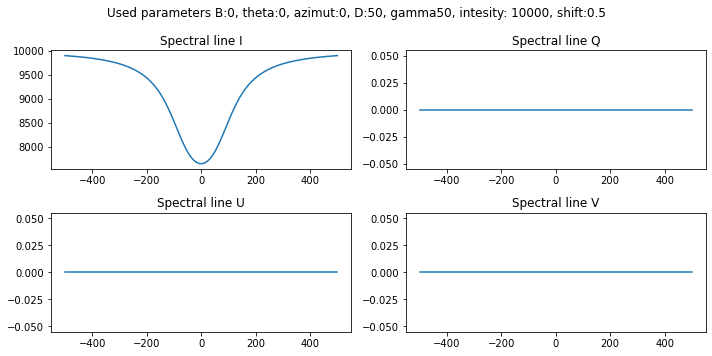

In [77]:
p_v = [0, 0, 0, 50, 50, 10, 10000, 0.5, 0]
_ = plot_lines(p_v)

Магнитного поля нет - ненулевая только компонента I

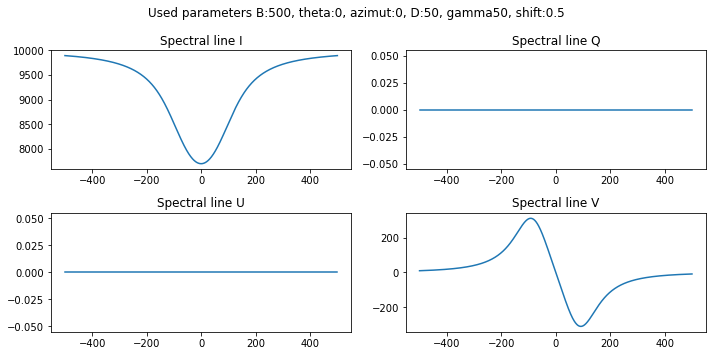

In [59]:
p_v = [500, 0, 0, 50, 50, 10, 10000, 0.5, 0]
_ = plot_lines(p_v)

Продольное магнитное поле - компоненты Q и U нулевые

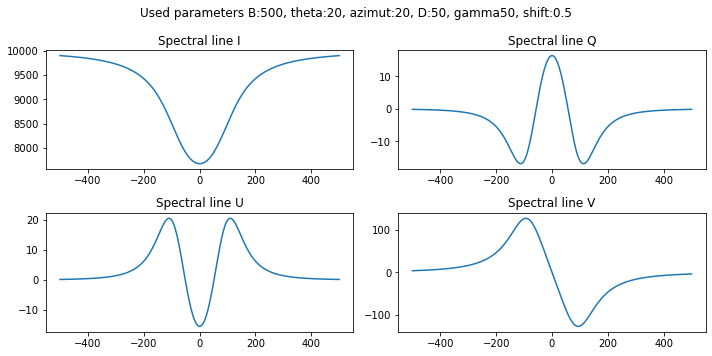

In [60]:
p_v = [500, 20, 20, 50, 50, 10, 10000, 0.5, 0, 0.5, 0]
_ = plot_lines(p_v)

### Функция с коэффициентом заполнения



Функция ME_ff аналогична предыдущей, но с введением двух дополнительных параметров инверсии - коэффициента заполнения элемента магнитным полем (filling factor) и доплеровского сдвига для немагнитной части элемента

Compute ME with filling factor


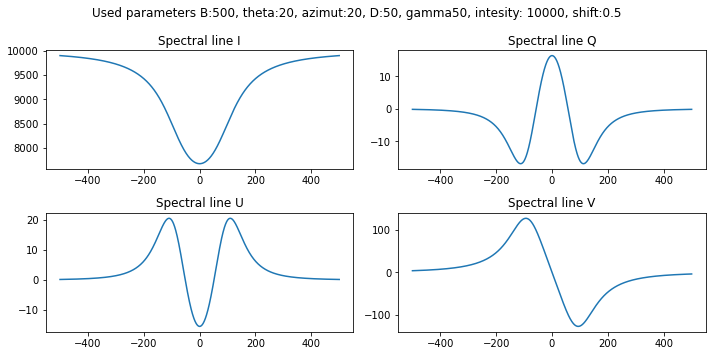

In [76]:
l_v = [6302.5, 2.5, 1]
p_v = [500, 20, 20, 50, 50, 10, 10000, 0.5, 0, 1, 0]
_ = plot_lines(p_v,ff=True)

Коэффициент заполнения = 1, профили полностью соответствуют примеру выше

Compute ME with filling factor


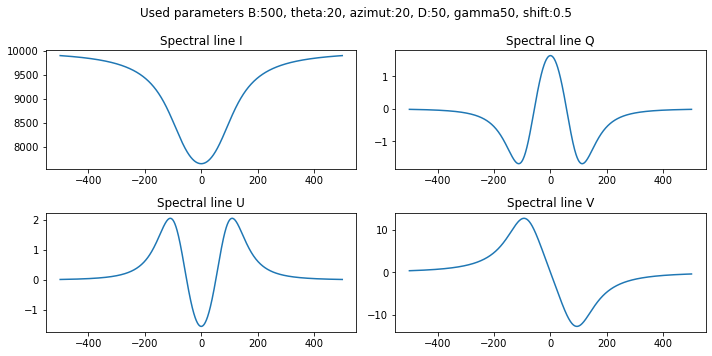

In [64]:
p_v = [500, 20, 20, 50, 50, 10, 10000, 0.5, 0, 0.1, 0]
_ = plot_lines(p_v,ff=True)

Коэффициент заполнения = 0.5, только половина элемента заполнена магнитным полем. Че-то тут не воспроизводится картинка почему-то, если просто код старый скопировать - то-же самое, надо смотреть код

## Нормировка интенсивности
Параметр 7 в векторе p_v - интенсивность. Он определяет величину профиля и при генерации просто домножается в конце на посчитанный профиль единичной амплитуды. В реальных измерениях интенсивность значительно меняется и является одним из параметров инверсии. Для hinode она лежит в интервале около [4000 : 20000]

In [80]:
argument = np.linspace(6302.0692255, 6303.2544205, 56)
line_arg = 1000*(argument - 6302.5)

In [66]:
p_v0 = [500, 20, 20, 50, 50, 10, 4000, 0.5, 0]
p_v1 = [500, 20, 20, 50, 50, 10, 20000, 0.5, 0]

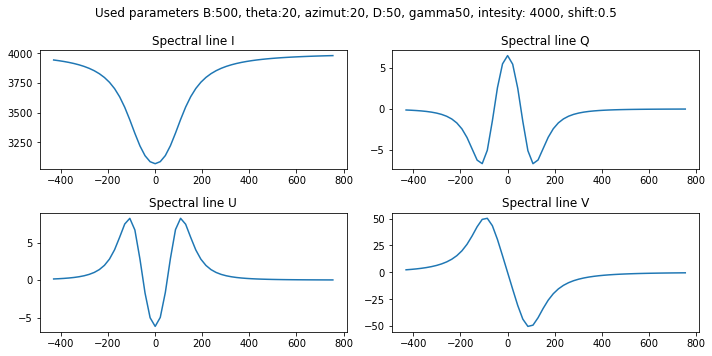

In [81]:
profiles0 = plot_lines(p_v0, xx = line_arg)

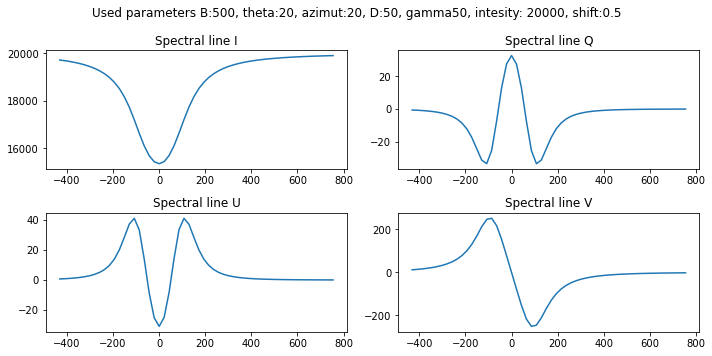

In [82]:
profiles1 = plot_lines(p_v1, xx = line_arg);

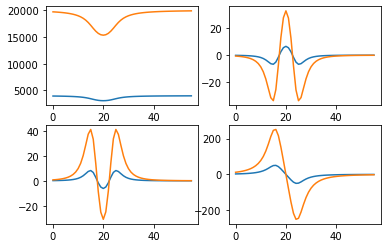

In [95]:
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.plot((np.array(profiles0))[i])
    plt.plot((np.array(profiles1))[i])

In [100]:
profiles0 = profiles0 / profiles0[0][0]
profiles1 = profiles1 / profiles1[0][0]

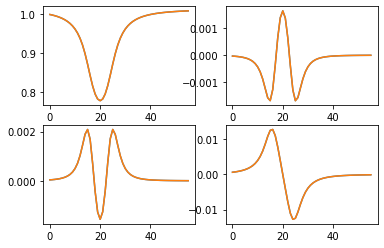

In [101]:
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.plot((np.array(profiles0))[i])
    plt.plot((np.array(profiles1))[i])

(Спектры совпали, т.к. остальные параметры равны)
Таким образом, можно значительно снизить искомый диапазон по величине интенсивности, оставив небольшой интервал около 1.